# UCI Default of Credit Card Clients Dataset

This notebook aims to perform analysis and prediction to the UCI Default of Credit Card Clients Dataset. The dataset contains information if Taiwanese credit card clients from the year 2005. The predictors are listed below. <br>



* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import os

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams["figure.figsize"] = (11, 5)
plt.rcParams["font.size"] = 10


In [2]:
file = "UCI_Credit_Card.csv"
path = os.path.join("datasets", file)
df = pd.read_csv(path, skiprows=[0], index_col="ID")
y = df.pop("default payment next month")
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [4]:
print("Total No. of Defaults: ", y.sum(), "\n", "% of Defaults: ", y.sum()/len(y)*100, "%")

Total No. of Defaults:  6636 
 % of Defaults:  22.12 %


## Demographic Analysis


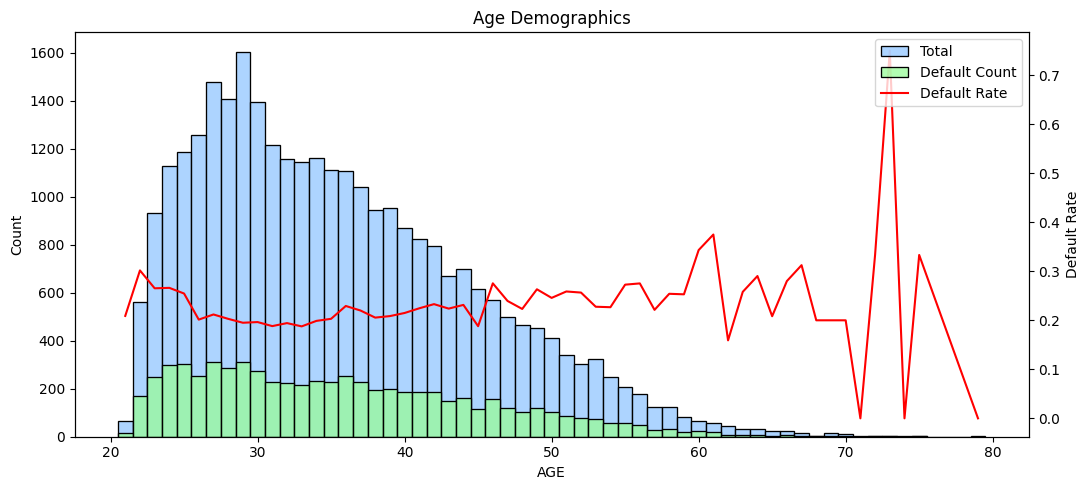

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(df["AGE"], discrete=True, label="Total", ax=ax)
defaults_by_age = df["AGE"][y == 1]
sns.histplot(defaults_by_age, color="palegreen", discrete=True, label="Default Count", ax=ax)

ax2 = ax.twinx()

relative_defaults_by_age = (y.groupby(df["AGE"]).sum().sort_index() / df["AGE"].value_counts(sort=False).sort_index()) 
ax2.plot(relative_defaults_by_age, color="red", label="Default Rate")
ax2.grid(False)
ax2.set_ylabel("Default Rate")

plt.title("Age Demographics", fontsize=12)

l1, label1 = ax.get_legend_handles_labels()
l2, label2 = ax2.get_legend_handles_labels()
ax2.legend(l1[1:] + l2, label1[1:] + label2, loc=1)

    
plt.tight_layout()
plt.show()

### Analysis of age demographics

   * We see the distribution of the ages in the dataset is right skewed with a mode of 28 years old
   * The default rate on young adults (age range between 20 and 25) is relatively high compared to older demographic groups.
   * From the the default rate curve, **we see that the demographic in the late 20s and early 30s are the clients that are least likely to default**
   * The default rate curve becomes erratic on ages 60 and above, this could be attributed to the fewer number of samples
   * This graph provides insight on the probability of defaults based on age but this information may not be probably used all by itselt due to ethical concerns about age discrimination

   
    

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

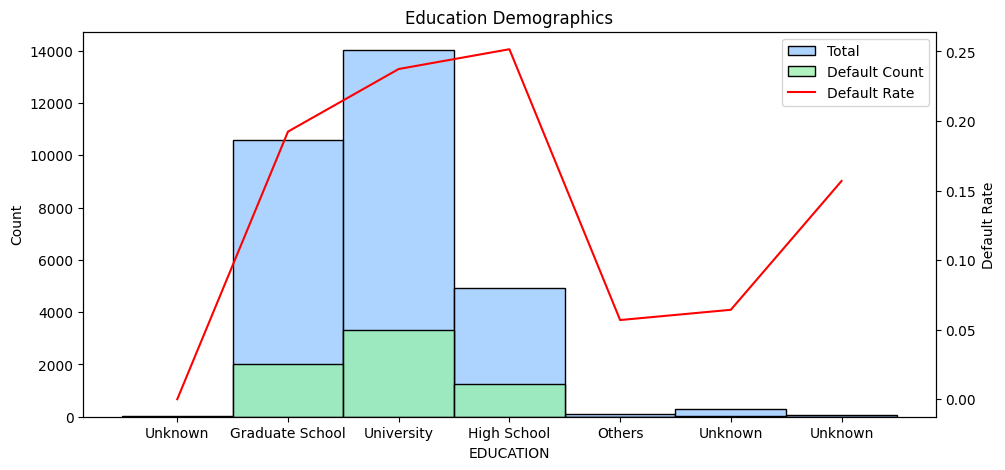

In [6]:
edu_ = df["EDUCATION"].copy()
defaults_by_edu = edu_[y == 1]

fig = plt.figure()
ax = fig.add_subplot(111)

sns.histplot(edu_, discrete=True, label="Total", ax=ax)
sns.histplot(defaults_by_edu, discrete=True, label="Default Count", ax=ax)

ax2 = ax.twinx()

relative_defaults_by_edu = y.groupby(edu_).sum().sort_index() / edu_.value_counts().sort_index()
ax2.plot(relative_defaults_by_edu, color="red", label="Default Rate")
ax2.set_ylabel("Default Rate")

l1, legends1 = ax.get_legend_handles_labels()
l2, legends2 = ax2.get_legend_handles_labels()

ax2.legend(l1[1::2] + l2, legends1[1::2] + legends2, loc=1)

education_brackets = ["Unknown", "Graduate School", "University", "High School", "Others", "Unknown", "Unknown"]
plt.xticks(np.arange(7), education_brackets)

plt.title("Education Demographics")
display(edu_.value_counts(sort=False).sort_index())

### Educational Attainment Demographics
  * We immediately see that we have some problem with the educational attainment series, we have 4 out of 6 categories to be unknown. But it should not really matter that much since their total count only comprises a small percentage of the total count of the clients
  
  * We see that, out of the three major educational attainment categories, **the clients with high school as their highest educational attainment are the most likely to default, they are followed by the university graduates, then the clients with graduate level education are the least likely to default**

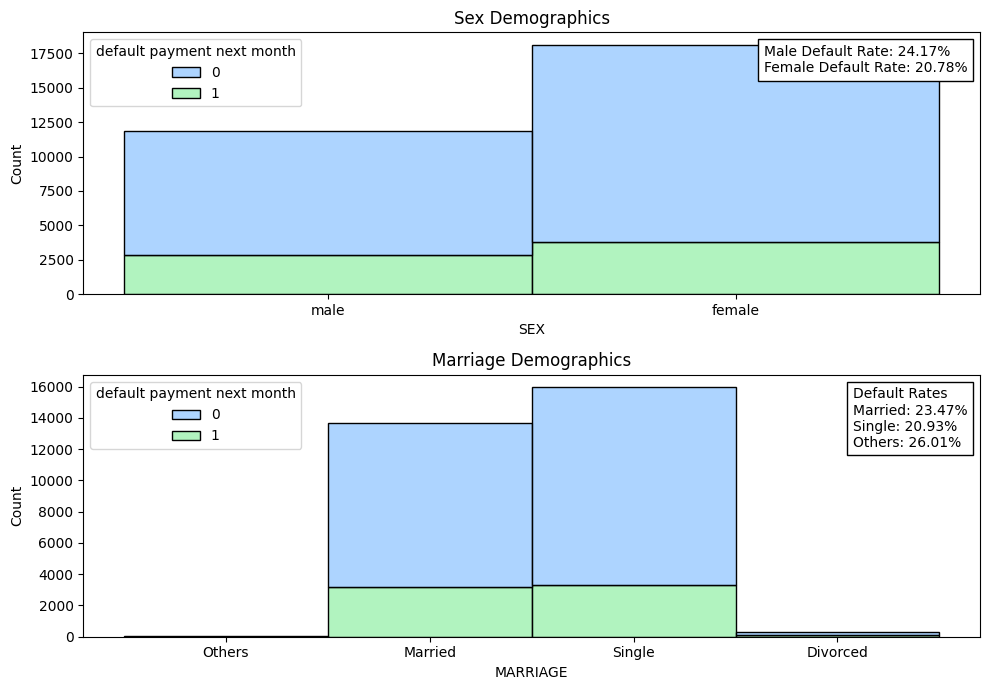

In [7]:
from matplotlib.offsetbox import AnchoredText

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))
sex_ = df["SEX"].value_counts()
sex_defaults = y.groupby(df["SEX"]).sum()
sex_default_rate = round(((sex_defaults / sex_) * 100), 2)


#sns.barplot(x=sex_.index, y=sex_, ax=ax[0])
sns.histplot(x=df["SEX"], ax=ax[0], hue=y, discrete=True, multiple="stack")
ax[0].set_xticks([1, 2],["male", "female"])
ax[0].set_title("Sex Demographics")

at = AnchoredText("Male Default Rate: {}% \nFemale Default Rate: {}%".format(sex_default_rate.iloc[0], sex_default_rate.iloc[1]),
                 loc="upper right", frameon=True)

ax[0].add_artist(at)

marriage_ = df["MARRIAGE"].value_counts().sort_index()
defaults_by_marriage = y.groupby(df["MARRIAGE"]).sum().sort_index()
marriage_default_rate = round((defaults_by_marriage / marriage_) * 100, 2)

sns.histplot(x=df["MARRIAGE"], ax=ax[1], hue=y, discrete=True, multiple="stack")

sns.move_legend(ax[1], "upper left")
ax[1].set_xticks(np.arange(4), ["Others", "Married", "Single", "Divorced"])
at2 = AnchoredText("Default Rates\nMarried: {}%\nSingle: {}%\nOthers: {}%".format(marriage_default_rate[1], marriage_default_rate[2], marriage_default_rate[3]),
                  loc="upper right")

ax[1].add_artist(at2)
ax[1].set_title("Marriage Demographics")

plt.tight_layout()

### Sex Demographics

We see that there are more females than males in the dataset, but we also see that males will have a higher chance of defaulting compared to their female counterparts.

### Marriage Demographics

The two main classes in the marriage demographics are the married and single categories. We see that married clients are the class that is more likely to default on their credit card.<br>


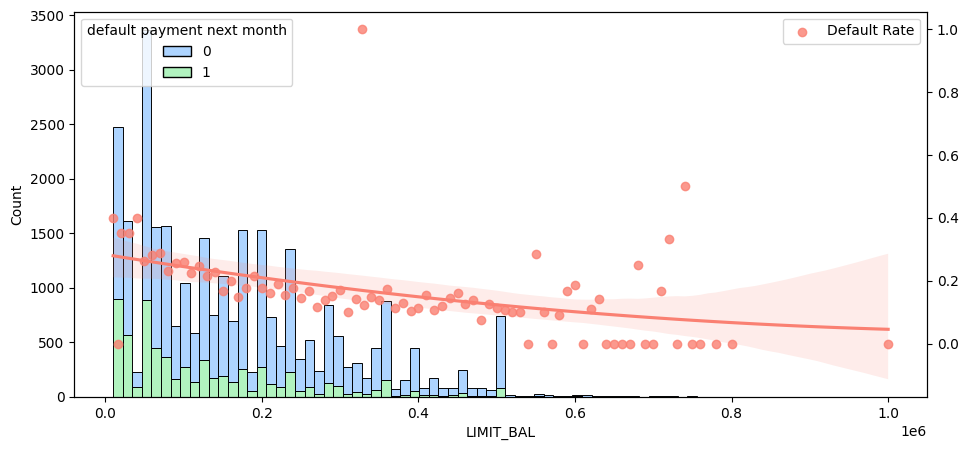

In [8]:
limit_bals = df["LIMIT_BAL"]
limit_bals_counts = limit_bals.value_counts().sort_index()
defaults_by_bals = y.groupby(limit_bals).sum().sort_index()
default_rate_by_bals = defaults_by_bals / limit_bals_counts
ax = sns.histplot(x=limit_bals, hue=y, multiple="stack")
sns.move_legend(ax, loc="upper left")

ax2 = ax.twinx()
sns.regplot(x=default_rate_by_bals.index, y=default_rate_by_bals, ax=ax2, order=2, color="salmon", label="Default Rate")
ax2.legend(loc="upper right")

### Balance Limits
We see that the majority of the clients have a balance limit of below 500K and that clients with higher balance limits are less likely to default than their counterparts with lower limits. 

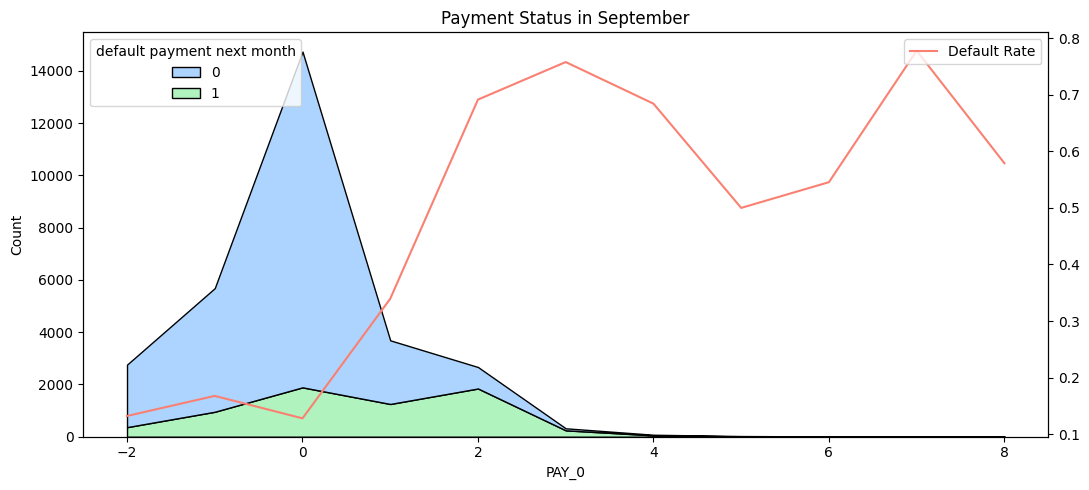

In [9]:
pay_ = df[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]

ax = sns.histplot(x=pay_["PAY_0"], discrete=True, element="poly", label="Payment status in September", hue=y, multiple="stack")
ax.set_title("Payment Status in September")
sns.move_legend(ax, "upper left")

ax2 = ax.twinx()

pay_0 = pay_["PAY_0"].value_counts().sort_index()
default_by_pay0 = y.groupby(df["PAY_0"]).sum().sort_index()
default_rate_by_pay0 = default_by_pay0 / pay_0

ax2.plot(default_rate_by_pay0, color="salmon", label="Default Rate")
ax2.legend(loc="upper right")

plt.tight_layout()

### Payment data
  * -2 &rarr; No balance
  * -1 &rarr; Pays in full
  *  0 &rarr; Paid minimum amount due
  *  1 &rarr; 1 month delay
  *  2...8 &rarr; 2...8 months delay


We see that there is a rapid increase in the default rates of the clients once they have a delay of payment of at least one month.  <br>


### BILL_AMT

(0.0, 250000.0)

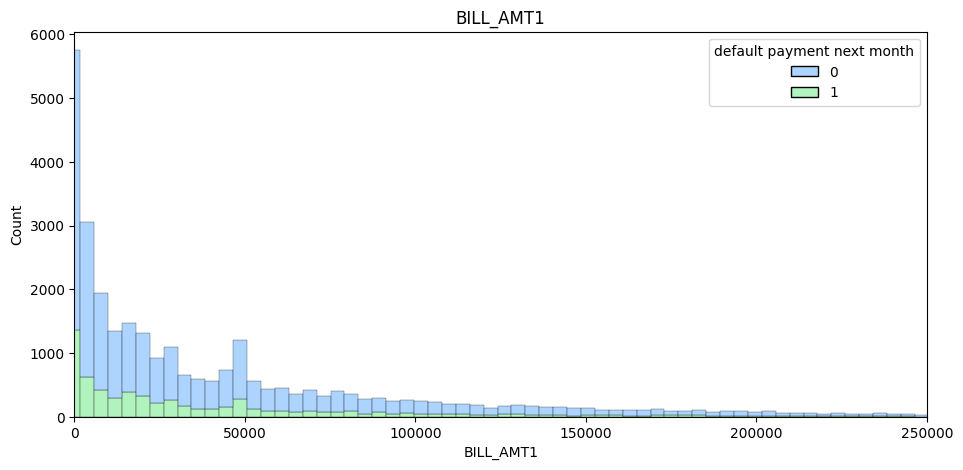

In [10]:
ax1 = sns.histplot(x=df.BILL_AMT1, hue=y, multiple="stack")
plt.title("BILL_AMT1")
plt.xlim(0, 250000)

We see that the bill_amt1 variable somewhat follows an exponential distribution. We see that the proportion of defaults for each bin somewhat remains constant .

### PAY_AMT

(0.0, 25000.0)

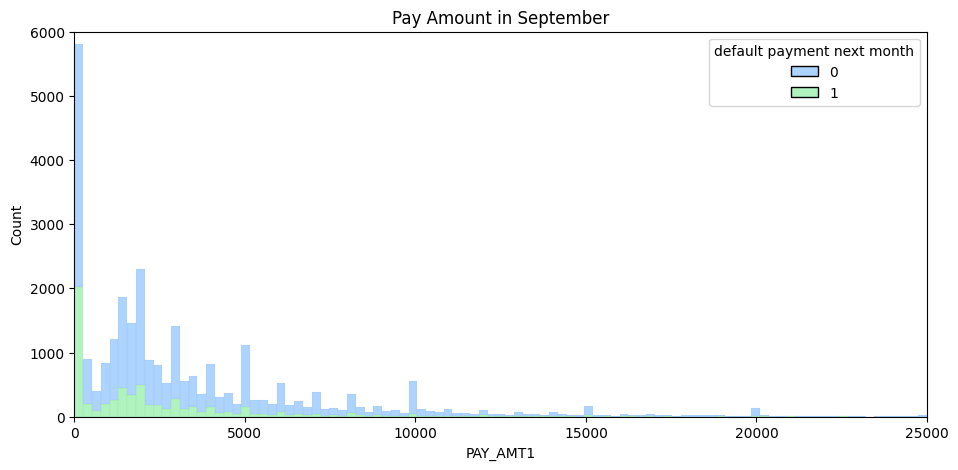

In [11]:
sns.histplot(data=df, x="PAY_AMT1", hue=y, multiple="stack")
plt.title("Pay Amount in September")
plt.ylim(0, 6000)
plt.xlim(0, 25000)

A significant portion of the clients that did not pay in september defaulted, as expected. We see that the distribution has a mean around 2000 to 2500 and is skewed to the right.

## Modelling Using CatBoost

In [12]:
X = df.copy()

num_feats = ["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
            "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "AGE"]
cat_feats = ["SEX", "EDUCATION", "MARRIAGE"]

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [14]:
from catboost import CatBoostClassifier, Pool

train_data = Pool(X_train, y_train)
catboost1 = CatBoostClassifier(iterations=100, verbose=False)
catboost1.fit(train_data)
preds= catboost1.predict(X_train)

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

score = cross_val_score(catboost1, X_train, y_train, cv=5)
print("Accuracy score: ", score.mean())

Accuracy score:  0.8157916666666667


In [25]:
# Create printing and helper functions

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def print_conf(y_true, y_pred, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 3))
        
    conf = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(conf, annot=True, ax=ax, cbar=False)
    plt.tight_layout()
    
    return ax

def get_precision_recall(y_true, y_pred, ax=None):
    metrics_score = precision_recall_fscore_support(y_true, y_pred, average="binary")
                            
    return metrics_score
    
def get_roc_auc(y_true, y_probas, ax=None):
    score = roc_auc_score(y_true, y_probas)
     
    return score


#Todo add KDfold precision recall conf matrix
def cross_val_test(X, y, model, folds=6):
    
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    if isinstance(y, pd.Series):
        y = y.to_numpy()
        
    kfold = KFold(n_splits=folds, shuffle=True)
    
    fig, ax = plt.subplots(nrows=2, ncols=3)
    
    metrics_df = pd.DataFrame()
    
    for i, (train, test) in enumerate(kfold.split(X)):
        
        X_train, X_test, y_train, y_test = X[train, :], X[test, :], y[train], y[test] 
        
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        
        print_conf(y_test, y_preds, ax=ax[int(i/3)][i % 3])
        
        accuracy = accuracy_score(y_test, y_preds)
        metrics = get_precision_recall(y_test, y_preds)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        
        metrics_df["fold_{}".format(i)] = np.append(metrics[:-1], [accuracy, roc_auc])
    
    metrics_df.index = ["precision", "recall", "f1_score", "Accuracy", "ROC_AUC"] 
    
    metrics_df["Average"] = metrics_df.mean(axis=1)
    display(metrics_df)

,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,Average
precision,0.686598,0.637317,0.676136,0.605313,0.659878,0.665272,0.655086
recall,0.375847,0.343891,0.394475,0.375294,0.364454,0.355307,0.368211
f1_score,0.485777,0.446730,0.498255,0.463326,0.469565,0.463219,0.471146
Accuracy,0.823750,0.811750,0.820250,0.815250,0.817000,0.815750,0.817292
ROC_AUC,0.778289,0.759789,0.765772,0.772251,0.752881,0.779841,0.768137


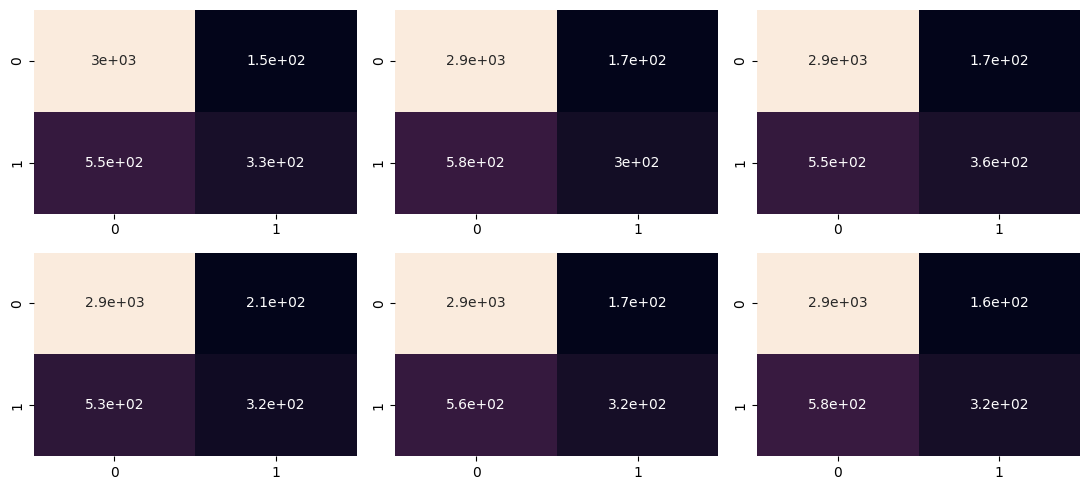

In [26]:
cross_val_test(X_train, y_train, catboost1)

Our accuracy is around 81.7%, better than a baseline model that predicts 0 all the time, which would have an accuracy of 78%. The precision is decent but the recall at 36.8% is not that good.

In [18]:
feat_importance = pd.Series(catboost1.get_feature_importance(), index=X_train.columns)
feat_importance.sort_values(ascending=False)

PAY_0        9.995633
LIMIT_BAL    8.205914
PAY_AMT3     7.414176
BILL_AMT1    6.724096
PAY_AMT6     6.091229
BILL_AMT2    6.076729
AGE          4.948458
BILL_AMT5    4.813670
PAY_AMT2     4.536182
PAY_AMT4     4.449369
PAY_2        4.344639
BILL_AMT4    4.267045
PAY_AMT5     4.056455
BILL_AMT6    3.947981
PAY_AMT1     3.702436
BILL_AMT3    2.879454
EDUCATION    2.512159
PAY_3        2.167142
MARRIAGE     2.143719
PAY_6        1.988643
PAY_4        1.966250
SEX          1.408558
PAY_5        1.360064
dtype: float64

The most important features, according to the SHAP values returned by the the catboost model, are the PAY_0, LIMIT_BAL, and BILL_AMT1. <br><br>
Lets try for perform a gridsearch to find better paramters.

In [24]:
model = CatBoostClassifier(logging_level="Silent")

grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 5, 6, 7],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations': [50, 75, 100, 150, 200] }

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train,
                                       search_by_train_test_split=False,
                                       cv=5,
                                       verbose=20)


0:	loss: 0.4472402	best: 0.4472402 (0)	total: 1.22s	remaining: 6m 3s
20:	loss: 0.4375275	best: 0.4283044 (16)	total: 33s	remaining: 7m 18s
40:	loss: 0.4279779	best: 0.4273695 (37)	total: 1m 27s	remaining: 9m 10s
60:	loss: 0.4287880	best: 0.4269365 (52)	total: 2m 42s	remaining: 10m 37s
80:	loss: 0.4376676	best: 0.4269365 (52)	total: 4m 6s	remaining: 11m 6s
100:	loss: 0.4276504	best: 0.4269365 (52)	total: 4m 56s	remaining: 9m 43s
120:	loss: 0.4290224	best: 0.4267859 (115)	total: 6m	remaining: 8m 53s
140:	loss: 0.4704932	best: 0.4267859 (115)	total: 7m 45s	remaining: 8m 44s
160:	loss: 0.4280656	best: 0.4267859 (115)	total: 9m 2s	remaining: 7m 48s
180:	loss: 0.4307697	best: 0.4266931 (169)	total: 9m 53s	remaining: 6m 30s
200:	loss: 0.4742284	best: 0.4265887 (184)	total: 12m 6s	remaining: 5m 57s
220:	loss: 0.4278612	best: 0.4265887 (184)	total: 15m 25s	remaining: 5m 30s
240:	loss: 0.4334491	best: 0.4265887 (184)	total: 16m 58s	remaining: 4m 9s
260:	loss: 0.4734688	best: 0.4261571 (244)	tota

In [27]:
grid_search_result["params"]

{'depth': 7, 'l2_leaf_reg': 3, 'iterations': 75, 'learning_rate': 0.1}

In [28]:
model2 = CatBoostClassifier(depth=7,
                           l2_leaf_reg=3,
                           iterations=75,
                           learning_rate=0.1,
                           verbose=False)
model2.fit(train_data)
preds_2 = model2.predict(X_train)

In [29]:
score = cross_val_score(model2, X_train, y_train, cv=5)
print("Accuracy score: ", score.mean())

Accuracy score:  0.820875


,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,Average
precision,0.692483,0.659751,0.697624,0.711207,0.656015,0.672199,0.681547
recall,0.350230,0.360544,0.359288,0.365044,0.403002,0.364045,0.367026
f1_score,0.465187,0.466276,0.474302,0.482456,0.499285,0.472303,0.476635
Accuracy,0.825250,0.818000,0.821000,0.823000,0.825000,0.819000,0.821875
ROC_AUC,0.775634,0.774103,0.776425,0.799682,0.786942,0.778655,0.781907


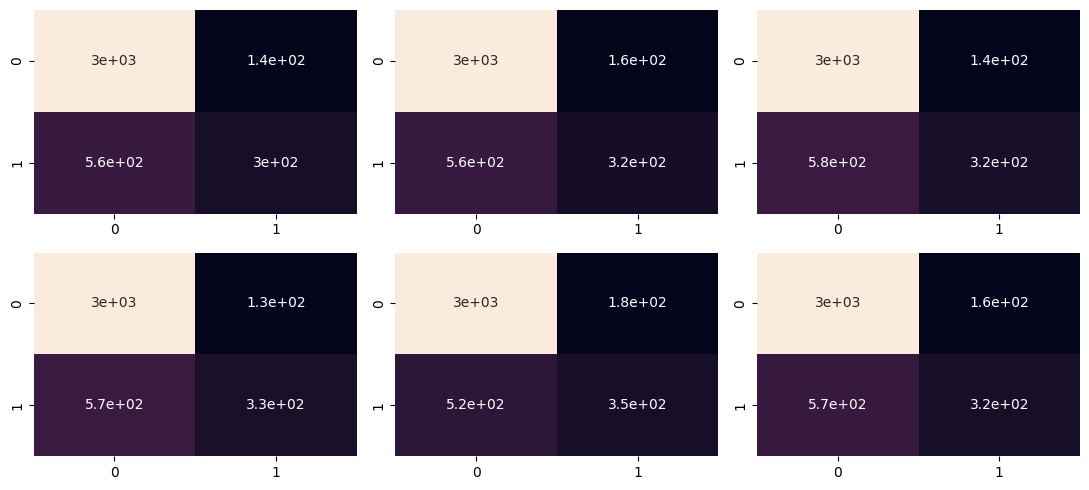

In [30]:
cross_val_test(X_train, y_train, model2)

Grid search improved our accuracy from 81.7% to 82.1%, which is not much but still an improvement. The precision is now at 67.6% whilst the recall is at 37%. This means that given that a sample is indeed going to default, the model will detect it 37% of the time. If our model predicts a sample is going to default, then 2/3 of the time the model is correct.

### Test Set Predictions

Text(0.5, 1.0, 'Confusion Matrix')

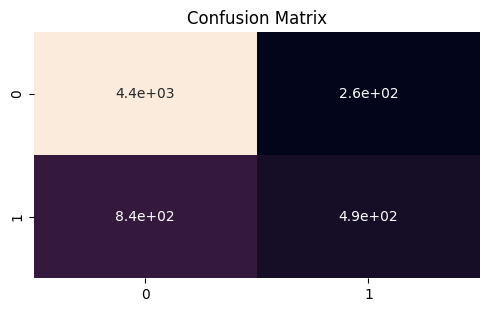

In [24]:
test_preds = model2.predict(X_test)
print_conf(y_test, test_preds)
plt.title("Confusion Matrix")

In [25]:
precision, recall, fscore, _ = get_precision_recall(y_test, test_preds)

print("Accuracy: ", (4400 + 470) / 6000)
print("Precision: ", precision)
print("Recall: ", recall)
print("Fscore: ", fscore)

Accuracy:  0.8116666666666666
Precision:  0.6532258064516129
Recall:  0.36623963828183875
Fscore:  0.4693384838242395


The performance on the test set is similar to what we've found on the cross-validation results. The accuracy is 81.17%. The precision and recall are 65.3% and 36.6% respectively.

In [31]:
feat_importance = pd.Series(model2.get_feature_importance(), index=X_train.columns)
feat_importance.sort_values(ascending=False)

PAY_0        21.675361
LIMIT_BAL     9.032100
BILL_AMT1     5.680092
PAY_AMT2      5.001900
PAY_AMT6      4.635732
PAY_AMT1      4.303886
PAY_3         4.052364
PAY_AMT4      3.935739
PAY_2         3.568183
PAY_AMT3      3.422669
BILL_AMT2     3.228873
BILL_AMT3     3.185329
PAY_5         3.165967
PAY_4         3.031042
AGE           3.028539
BILL_AMT5     2.844371
PAY_AMT5      2.613746
EDUCATION     2.602342
MARRIAGE      2.542357
BILL_AMT6     2.499360
SEX           2.364104
PAY_6         2.110915
BILL_AMT4     1.475029
dtype: float64

In [38]:
import shap

In [39]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test)

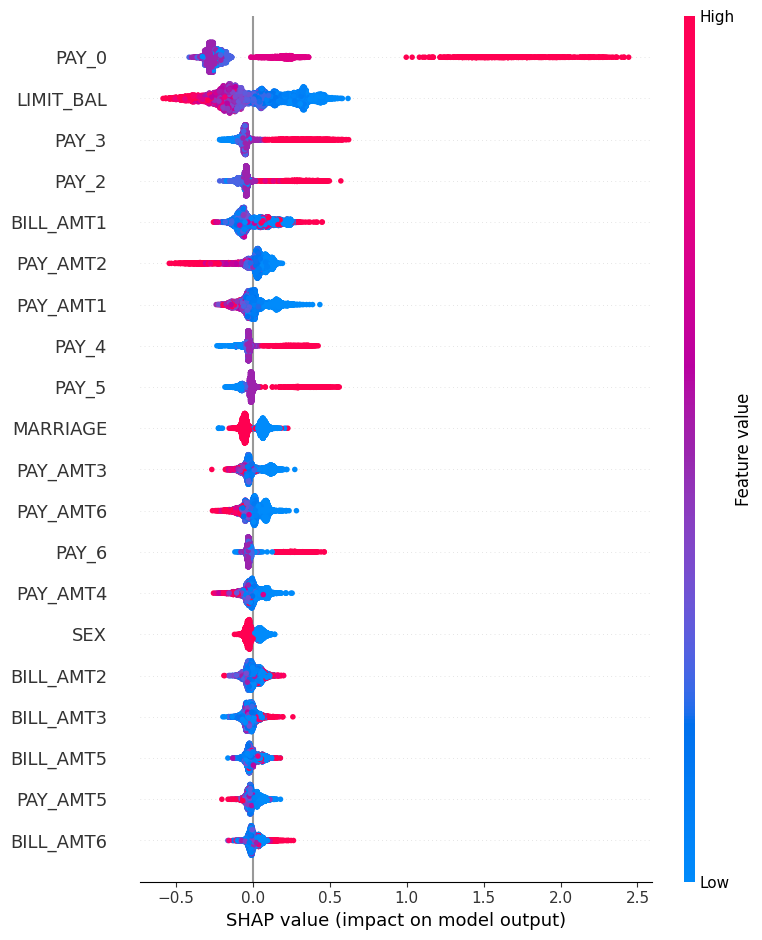

In [40]:
shap.summary_plot(shap_values, X_test)

#### Conlclusions based on the shap values
* PAY_0, PAY_2 ... PAY_6 - More delayed payments leads to a higher chance of defaulting.
* LIMIT_BAL - Clients with less credit are less likely to default.
* SEX - Males are more likely to default than females.
* PAY_AMT - Low amounts of previous payments yields to a higher chance of default rates
* Marriage - Married clients are more likely to default than their counterparts.

We see that the best predictors of default are the credit history of the client. In order to improve this model, we would have to include more details on the credit history of the borrower such as past loans and payment histories. 

#### Variable definitions:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
